## Circuit creation

In [1]:
L = 8
J = 1
h = 0.05
lamb = 0.9

particle_pair_left_position = 3
particle_pair_length = 1

final_time = 4
layers = 20
measure_every_layers = 1

In [2]:
import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers)

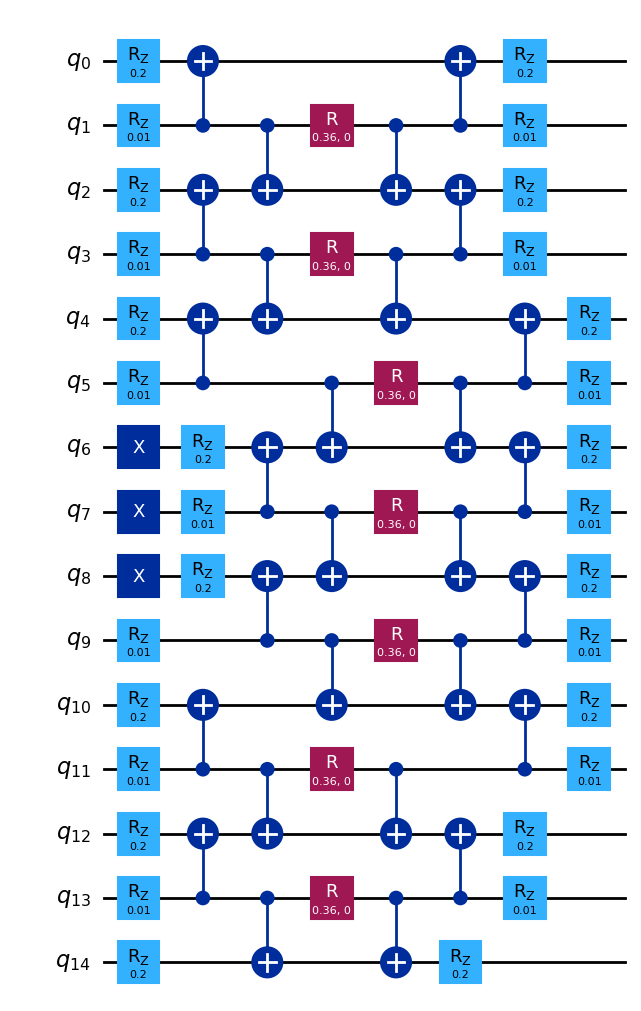

In [3]:
logical_circs[1].draw(output="mpl")

In [4]:
logical_circs[10].depth(lambda x: len(x.qubits) == 2)

40

## Ideal statevector circuit simulation

In [7]:
from utils.sexec import execute_simulation_estimator_batch
from z2chain.operators import local_pauli_z
from functools import partial

estimator_options = {
    "default_precision": 0
}

simulator_options = {
    "method": "statevector"
}

observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]

jobs = execute_simulation_estimator_batch(simulator_options, estimator_options, logical_circs, observables_generating_funcs)

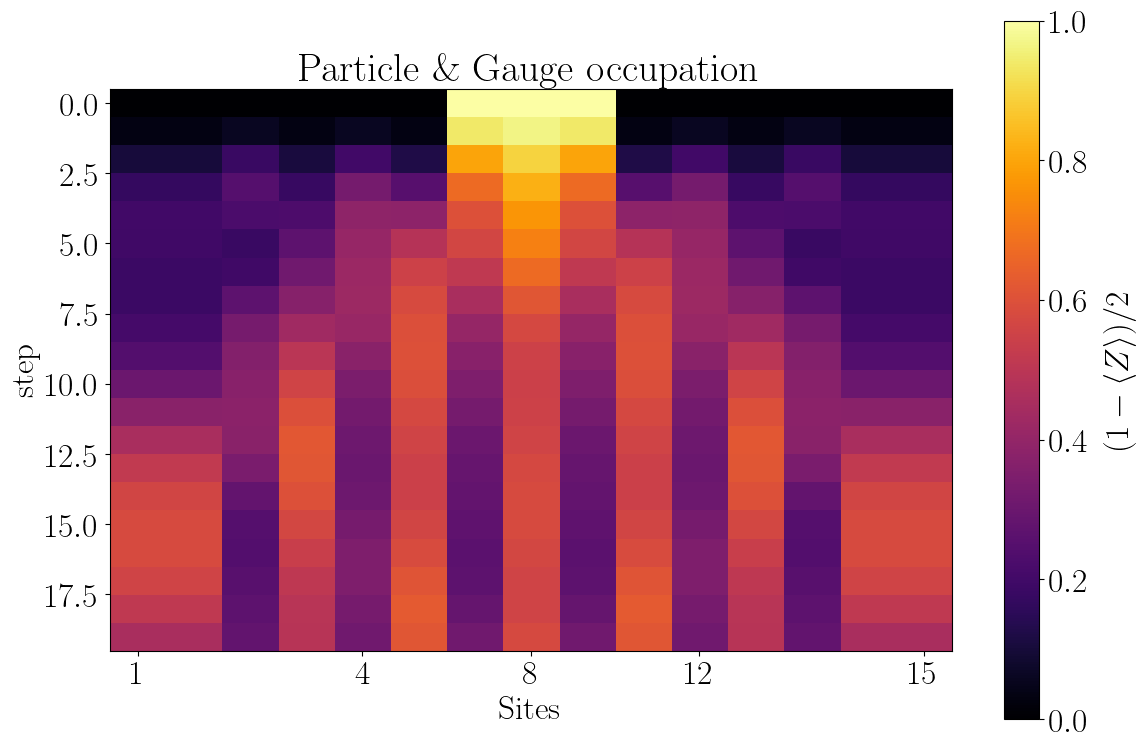

In [8]:
from z2chain.plotting import x_t_plot

x_t_plot(jobs, filepath=f"Plots/circuit_trotter_maxt_{final_time}_steps_{layers}_z2ppairquench_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_{particle_pair_length}.png")

## Comparison with ED

In [54]:
final_time = 4
steps = 20

results_filepath = f"Results/dual_z2ppairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_{particle_pair_length}.txt"
overwrite = False

import z2chain.exact as z2ced

exact_occupation_site_gauge_matrix = z2ced.dual_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, filepath=results_filepath, overwrite=overwrite, print_mode=True)

t = 100.0000 / t_f = 100.0000                    

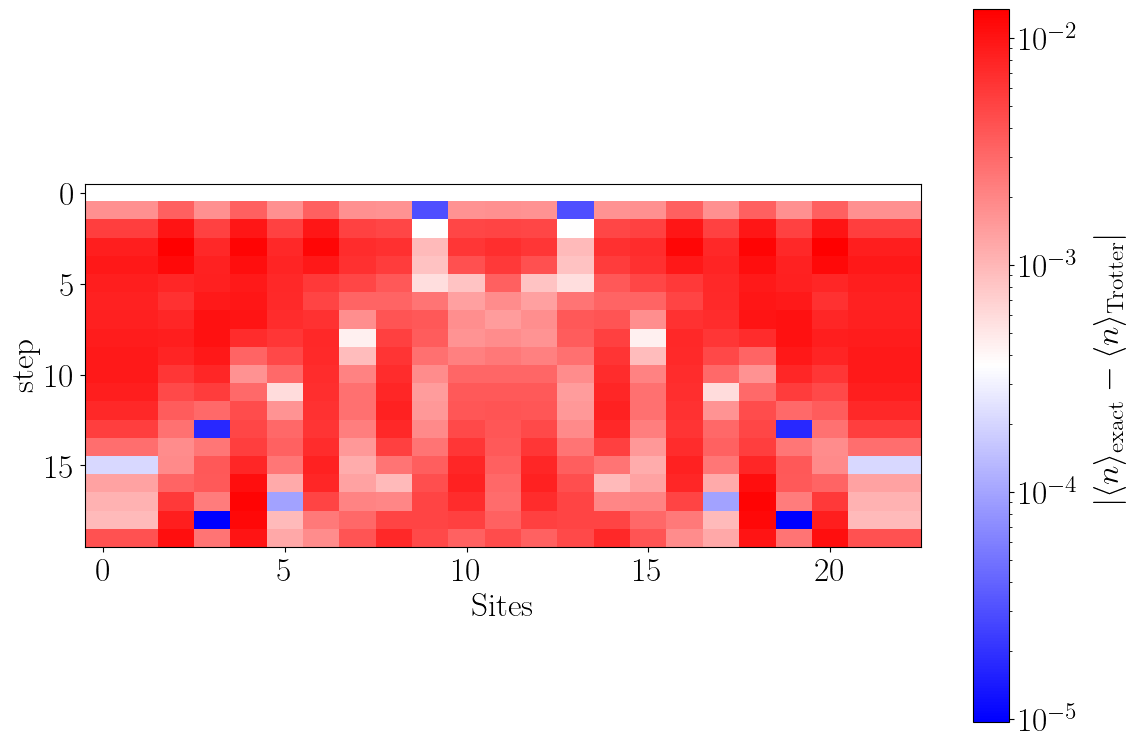

In [55]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(exact_occupation_site_gauge_matrix, jobs, filepath=f"Plots/discrepancies_exact_circuit_trotter__z2ppairquench_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_{particle_pair_length}.png")

In [53]:
final_time = 10
steps = 100

results_filepath = f"Results/trotter_z2ppairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}.txt"
overwrite = False

import z2chain.exact as z2ced

trotter_ed_occupation_site_gauge_matrix = z2ced.trotter_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, filepath=results_filepath, overwrite=overwrite, print_mode=True)

Creating occupation operators...                 

Creating propagator...                           

malloc fails for local dworkptr[].

MemoryError: 

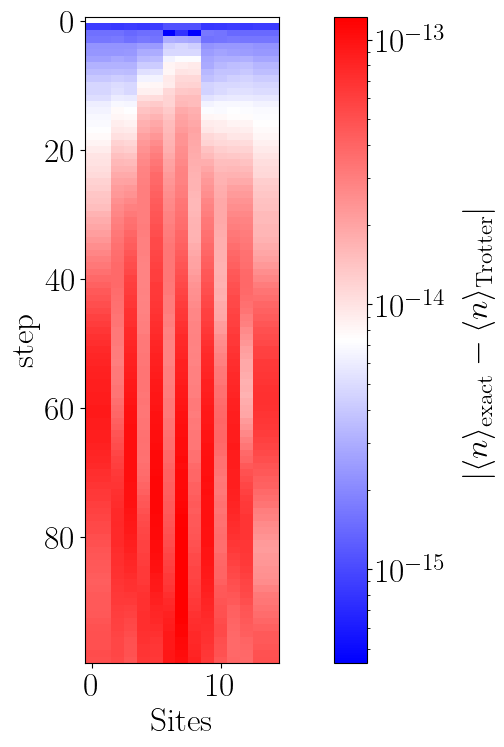

In [ ]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(trotter_ed_occupation_site_gauge_matrix, jobs)

## They are identical up to numerical errors ✅